K-Nearest Neighbors  
Naive Bayes  
Decision Tree  
Random Forest  
XgBoost  
Support Vector Machine  
Neural Network

In [8]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os



In [9]:
import warnings
warnings.filterwarnings('ignore')
# read file
voice=pd.read_csv('/voice.csv')
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [10]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
voice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


Preprocessing: label encoder and normalization

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
voice["label"] = le.fit_transform(voice["label"])
le.classes_

array(['female', 'male'], dtype=object)

In [14]:
voice[:]=preprocessing.MinMaxScaler().fit_transform(voice)
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,...,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1.0
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,...,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,1.0
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,...,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,1.0
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,...,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,1.0
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,...,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,1.0


Visualization

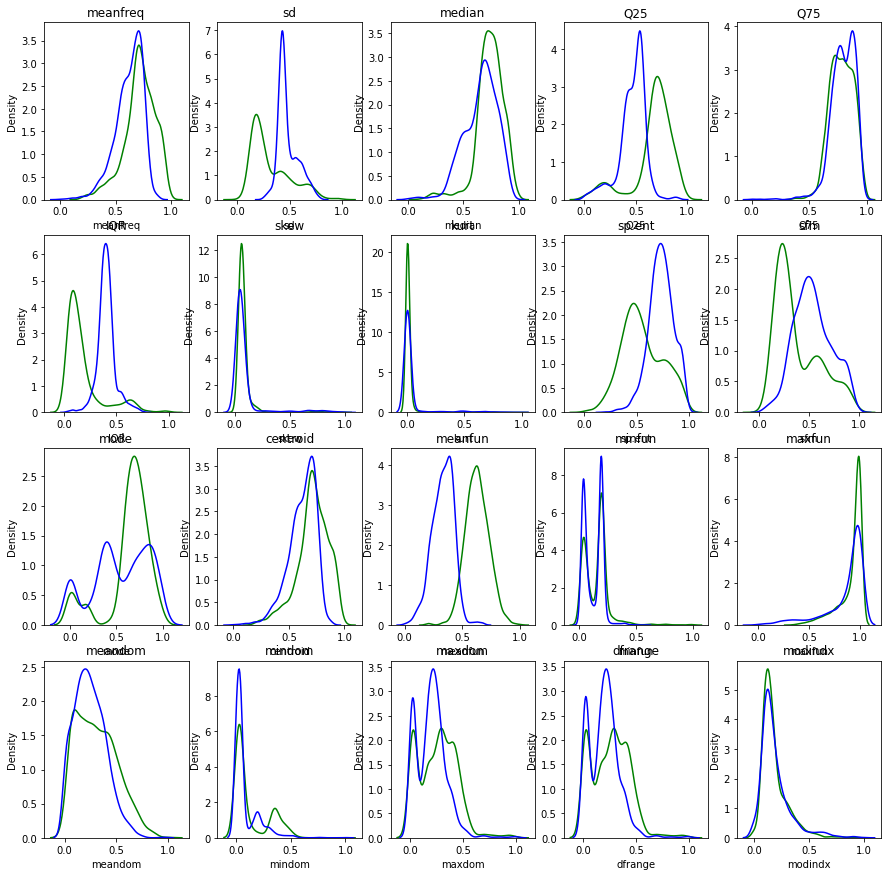

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(4,5,figsize=(15,15))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(voice.columns[i-1])
    sns.kdeplot(voice.loc[voice['label'] == 0, voice.columns[i-1]], color= 'green', label='F')
    sns.kdeplot(voice.loc[voice['label'] == 1, voice.columns[i-1]], color= 'blue', label='M')

At first glance, most significant features are Q25, IQR and meanfun. We will build models by using the 20 features and the 3 distinct features.

Using K-Nearest Neighbors, Naive Bayes, Decision Tree, Random Forest, XgBoost, Support Vector Machine, Neural Network to build models

In [16]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network
import xgboost

In [17]:
# Split the data
train, test = train_test_split(voice, test_size=0.3)

In [18]:
train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
553,0.632757,0.524496,0.653215,0.442806,0.870848,0.502739,0.061808,0.005041,0.773748,0.650084,...,0.632757,0.198393,0.050357,0.929285,0.169830,0.006452,0.162259,0.162375,0.175168,1.0
216,0.652996,0.425988,0.654083,0.504866,0.803398,0.372790,0.030166,0.001605,0.826119,0.585297,...,0.652996,0.354916,0.047256,0.954963,0.222150,0.195699,0.166905,0.163090,0.177426,1.0
2373,0.945598,0.139861,0.936918,0.933495,0.934897,0.054662,0.056913,0.003513,0.299454,0.130639,...,0.945598,0.610983,0.197717,0.972570,0.707731,0.040860,0.528234,0.527897,0.122180,0.0
316,0.558356,0.445362,0.577121,0.419390,0.711356,0.372389,0.056048,0.004304,0.800397,0.636284,...,0.558356,0.296397,0.022796,0.799959,0.388210,1.000000,0.181246,0.160721,0.387557,1.0
3058,0.801846,0.269198,0.819545,0.795136,0.819254,0.086357,0.062483,0.004624,0.517888,0.283671,...,0.801846,0.821097,0.088787,0.871017,0.142949,0.451613,0.040297,0.031071,0.429398,0.0


In [19]:
x_train = train.iloc[:, :-1]
y_train = train["label"]
x_test = test.iloc[:, :-1]
y_test = test["label"]

In [20]:
x_train3 = train[["meanfun","IQR","Q25"]]
y_train3 = train["label"]
x_test3 = test[["meanfun","IQR","Q25"]]
y_test3 = test["label"]

In [21]:
def classify(model,x_train,y_train,x_test,y_test):
    from sklearn.metrics import classification_report
    target_names = ['female', 'male']
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

## K-Nearest Neighbors
Using neighbors.KNeighborsClassifier() to build the model.

In [22]:
def knn_error(k,x_train,y_train,x_test,y_test):
    error_rate = []
    K=range(1,k)
    for i in K:
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at k=%s." % (error_rate[kloc], K[kloc]))

    plt.plot(K, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    return K[kloc]

Lowest error is 0.026288117770767613 occurs at k=4.


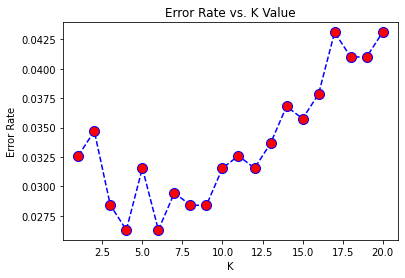

In [23]:
k=knn_error(21,x_train,y_train,x_test,y_test)

In [24]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9708    0.9769    0.9739       477
        male     0.9766    0.9705    0.9735       474

    accuracy                         0.9737       951
   macro avg     0.9737    0.9737    0.9737       951
weighted avg     0.9737    0.9737    0.9737       951



Lowest error is 0.027339642481598318 occurs at k=3.


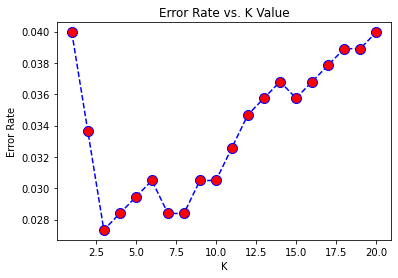

In [25]:
k=knn_error(21,x_train3,y_train3,x_test3,y_test3)

In [26]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9787    0.9644    0.9715       477
        male     0.9647    0.9789    0.9717       474

    accuracy                         0.9716       951
   macro avg     0.9717    0.9716    0.9716       951
weighted avg     0.9717    0.9716    0.9716       951



## Naive Bayes
Using naive_bayes.GaussianNB() to build the model.

In [27]:
model=naive_bayes.GaussianNB()
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.8645    0.8826    0.8734       477
        male     0.8793    0.8608    0.8699       474

    accuracy                         0.8717       951
   macro avg     0.8719    0.8717    0.8717       951
weighted avg     0.8719    0.8717    0.8717       951



In [28]:
model=naive_bayes.GaussianNB()
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9661    0.9560    0.9610       477
        male     0.9562    0.9662    0.9612       474

    accuracy                         0.9611       951
   macro avg     0.9611    0.9611    0.9611       951
weighted avg     0.9611    0.9611    0.9611       951



## Decision Tree
Using tree.DecisionTreeClassifier() to build the model.

In [29]:
#Find the best parameter to prune the tree
def dt_error(n,x_train,y_train,x_test,y_test):
    nodes = range(2, n)
    error_rate = []
    for k in nodes:
        model = tree.DecisionTreeClassifier(max_leaf_nodes=k)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[kloc], nodes[kloc]))
    plt.plot(nodes, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.xlabel('Tree Size')
    plt.ylabel('Cross-Validated MSE')
    plt.show()
    return nodes[kloc]

Lowest error is 0.033648790746582544 occurs at n=7.


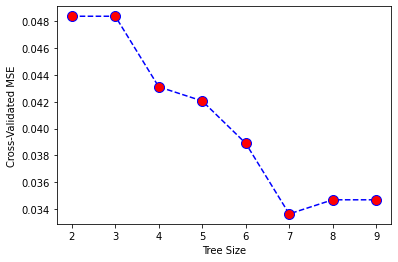

In [30]:
n=dt_error(10,x_train,y_train,x_test,y_test)

In [31]:
#prune tree
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
classify(pruned_tree,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9704    0.9623    0.9663       477
        male     0.9623    0.9705    0.9664       474

    accuracy                         0.9664       951
   macro avg     0.9664    0.9664    0.9664       951
weighted avg     0.9664    0.9664    0.9664       951



Lowest error is 0.03259726603575184 occurs at n=7.


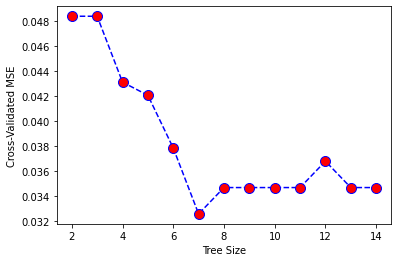

In [32]:
n=dt_error(15,x_train3,y_train3,x_test3,y_test3)

In [33]:
#prune tree
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
classify(pruned_tree,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9705    0.9644    0.9674       477
        male     0.9644    0.9705    0.9674       474

    accuracy                         0.9674       951
   macro avg     0.9674    0.9674    0.9674       951
weighted avg     0.9674    0.9674    0.9674       951



## Random Forest
Using ensemble.RandomForestClassifier() to build the model.

In [34]:
def rf_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    e=range(1,n,20)
    for i in e:
        model = ensemble.RandomForestClassifier(n_estimators = i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    nloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[nloc], e[nloc]))

    plt.plot(e, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. n Value')
    plt.xlabel('n')
    plt.ylabel('Error Rate')
    plt.show()
    return e[nloc]

Lowest error is 0.026288117770767613 occurs at n=61.


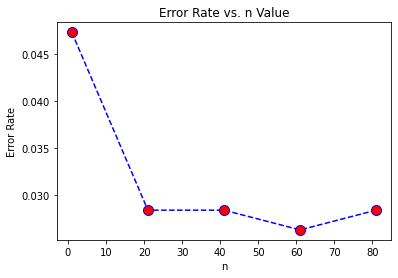

In [35]:
e=rf_error(100,x_train,y_train,x_test,y_test)

In [36]:
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9748    0.9748    0.9748       477
        male     0.9747    0.9747    0.9747       474

    accuracy                         0.9748       951
   macro avg     0.9748    0.9748    0.9748       951
weighted avg     0.9748    0.9748    0.9748       951



Lowest error is 0.03259726603575184 occurs at n=41.


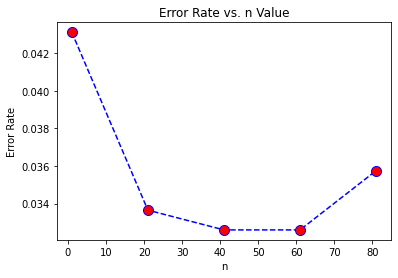

In [37]:
e=rf_error(100,x_train3,y_train3,x_test3,y_test3)

In [38]:
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9705    0.9644    0.9674       477
        male     0.9644    0.9705    0.9674       474

    accuracy                         0.9674       951
   macro avg     0.9674    0.9674    0.9674       951
weighted avg     0.9674    0.9674    0.9674       951



## XgBoost
Using xgboost.XGBClassifier() to build the model.

In [39]:
model = xgboost.XGBClassifier()
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9729    0.9790    0.9760       477
        male     0.9788    0.9726    0.9757       474

    accuracy                         0.9758       951
   macro avg     0.9758    0.9758    0.9758       951
weighted avg     0.9758    0.9758    0.9758       951



In [40]:
model = xgboost.XGBClassifier()
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9703    0.9602    0.9652       477
        male     0.9603    0.9705    0.9654       474

    accuracy                         0.9653       951
   macro avg     0.9653    0.9653    0.9653       951
weighted avg     0.9654    0.9653    0.9653       951



## Support Vector Machine
Using svm.SVC() to build the model.

In [41]:
def svm_kernel(x_train,y_train,x_test,y_test):
    rate=[]
    kernel=['rbf','poly','linear']
    for i in kernel:
        model=svm.SVC(kernel=i).fit(x_train,y_train)
        y_pred=model.predict(x_train)
        print(i, ' in-sample accuracy in SVM: ', accuracy_score(y_train,y_pred))
        y_pred=model.predict(x_test)
        print(i, ' out-of-sample accuracy in SVM: ', accuracy_score(y_test,y_pred))
        rate.append(accuracy_score(y_test,y_pred))
    nloc = rate.index(max(rate))
    print("Highest accuracy is %s occurs at %s kernel." % (rate[nloc], kernel[nloc]))
    return kernel[nloc]

In [42]:
def svm_error(k,C,x_train,y_train,x_test,y_test):
    error_rate = []
    C=range(1,C)
    for i in C:
        model=svm.SVC(kernel=k,C=i).fit(x_train,y_train)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    cloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[cloc], C[cloc]))

    plt.plot(C, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. C Value')
    plt.xlabel('C')
    plt.ylabel('Error Rate')
    plt.show()
    return C[cloc]

In [43]:
k=svm_kernel(x_train,y_train,x_test,y_test)

rbf  in-sample accuracy in SVM:  0.979702300405954
rbf  out-of-sample accuracy in SVM:  0.9674027339642481
poly  in-sample accuracy in SVM:  0.9828597203428056
poly  out-of-sample accuracy in SVM:  0.9747634069400631
linear  in-sample accuracy in SVM:  0.9769959404600812
linear  out-of-sample accuracy in SVM:  0.9726603575184016
Highest accuracy is 0.9747634069400631 occurs at poly kernel.


Lowest error is 0.025236593059936908 occurs at C=1.


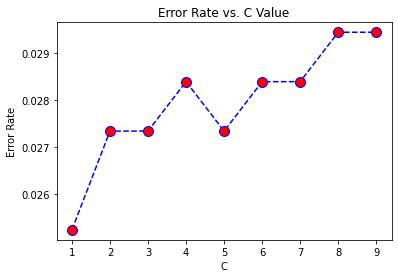

In [44]:
c=svm_error(k,10,x_train,y_train,x_test,y_test)

In [45]:
model=svm.SVC(kernel=k,C=c)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9729    0.9769    0.9749       477
        male     0.9767    0.9726    0.9746       474

    accuracy                         0.9748       951
   macro avg     0.9748    0.9748    0.9748       951
weighted avg     0.9748    0.9748    0.9748       951



In [46]:
k=svm_kernel(x_train3,y_train3,x_test3,y_test3)

rbf  in-sample accuracy in SVM:  0.9760938204781235
rbf  out-of-sample accuracy in SVM:  0.9621451104100947
poly  in-sample accuracy in SVM:  0.9738385205232296
poly  out-of-sample accuracy in SVM:  0.9631966351209253
linear  in-sample accuracy in SVM:  0.9693279206134416
linear  out-of-sample accuracy in SVM:  0.9589905362776026
Highest accuracy is 0.9631966351209253 occurs at poly kernel.


Lowest error is 0.03680336487907466 occurs at C=1.


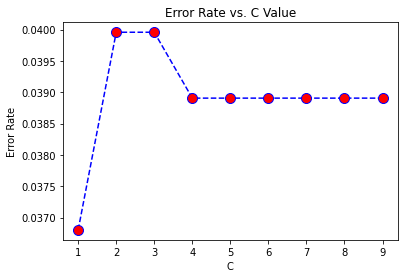

In [47]:
c=svm_error(k,10,x_train3,y_train3,x_test3,y_test3)

In [48]:
model=svm.SVC(kernel=k,C=c)
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9722    0.9539    0.9630       477
        male     0.9545    0.9726    0.9634       474

    accuracy                         0.9632       951
   macro avg     0.9633    0.9632    0.9632       951
weighted avg     0.9634    0.9632    0.9632       951



## Neural Network
Using neural_network.MLPClassifier to build the model.

In [49]:
def nn_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=range(1,n)
    for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=i,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[kloc], hidden_layer[kloc]))

    plt.plot(hidden_layer, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. Hidden Layer Size')
    plt.xlabel('Size')
    plt.ylabel('Error Rate')
    plt.show()
    return hidden_layer[kloc]

Lowest error is 0.030494216614090432 occurs at C=14.


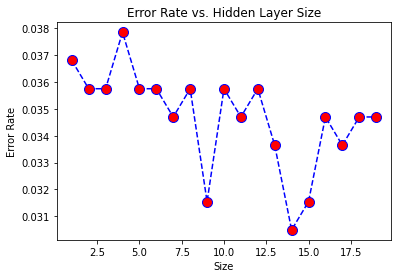

In [50]:
h=nn_error(20,x_train,y_train,x_test,y_test)

In [51]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9647    0.9748    0.9698       477
        male     0.9744    0.9641    0.9692       474

    accuracy                         0.9695       951
   macro avg     0.9696    0.9695    0.9695       951
weighted avg     0.9696    0.9695    0.9695       951



Lowest error is 0.03995793901156677 occurs at C=13.


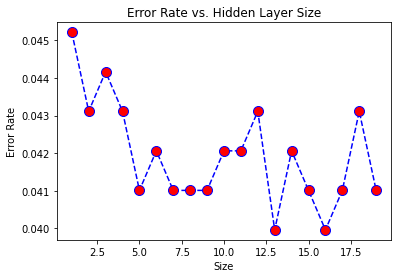

In [52]:
h=nn_error(20,x_train3,y_train3,x_test3,y_test3)

In [53]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9741    0.9455    0.9596       477
        male     0.9467    0.9747    0.9605       474

    accuracy                         0.9600       951
   macro avg     0.9604    0.9601    0.9600       951
weighted avg     0.9604    0.9600    0.9600       951



We can see that the highest accurracy is 98.74% 